![](../../logo.png)

# Physics Informed Neural Networks in Astrophysics

---

### Alexis Larrañaga - 2024
ealarranaga@unal.edu.co

---

## Solution of a PDE (2-dimensional Poisson Equation)

Poisson equation is: ￼
$$
\nabla^2 u = \rho
$$

Considering a 2-dimensional system with the source function $\rho(x,y) = -2\pi^2 \cos (\pi x)  \sin (\pi y)$, gives the differential equation 
$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}  = -2\pi^2 \cos (\pi x)  \sin (\pi y).
$$

In order to solve this equation we will consider the spatial domain $(x,y) \in [-1,1]\times [-1,1]$ and Dirichlet boundary conditions with
$$
u(-1,y) = u(1,y) = u(x,-1) = u(x,1) = \cos (\pi x)  \sin (\pi y).
$$

In [1]:
import pinnde.pde_Solvers as pde_Solvers
import pinnde.pde_Initials as pde_Initials
import pinnde.pde_Boundaries_2var as pde_Boundaries
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

u0 = lambda x: x
ut0 = lambda x: 0+x*0
t_bdry = [0, 10]
x_bdry = [-1, 1]
t_order = 2
N_iv = 200
initials = pde_Initials.setup_initials_2var(t_bdry, x_bdry, t_order, [u0, ut0], N_iv)

N_bc = 100
xleft_boundary = lambda x: -(tf.cos(x))
xright_boundary = lambda x: tf.cos(x)
boundaries = pde_Boundaries.setup_boundaries_dirichlet_tx(t_bdry, x_bdry, N_bc, 
                        xleft_boundary_cond=xleft_boundary, xright_boundary_cond=xright_boundary)

eqn = "utt - uxx + u**2 - (-(x*tf.cos(t)) + (x**2)*((tf.cos(t))**2))"
N_pde = 10000
epochs = 3000
layers = 6
nodes = 50

mymodel = pde_Solvers.solvePDE_tx(eqn, initials, boundaries, N_pde, 
                                    net_layers = layers, net_units = nodes)
mymodel.train_model(epochs)

mymodel.plot_epoch_loss('epoch_loss.png')

mymodel.plot_solution_prediction('solution.png')


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalize_1         │ (None, 1)         │          0 │ input_layer[0][0] │
│ (Normalize)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalize_3         │ (None, 1)         │          0 │ input_layer_1[0]… │
│ (Normalize)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2)         │          0 │ normalize_1[0][0… │
│ (Concatenate)       │                   │            │ normalize_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │        150 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 50)        │      2,550 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 50)        │      2,550 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 50)        │      2,550 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 50)        │      2,550 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 50)        │      2,550 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         51 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,951 (101.18 KB)

 Trainable params: 12,951 (101.18 KB)

 Non-trainable params: 0 (0.00 B)

PDE loss, IV loss, BC loss in 0th epoch:  0.2460,  0.1374,  0.5648.
PDE loss, IV loss, BC loss in 100th epoch:  0.0030,  0.0003,  0.0012.
PDE loss, IV loss, BC loss in 200th epoch:  0.0007,  0.0001,  0.0003.
PDE loss, IV loss, BC loss in 300th epoch:  0.0004,  0.0000,  0.0001.
PDE loss, IV loss, BC loss in 400th epoch:  0.0003,  0.0000,  0.0006.
PDE loss, IV loss, BC loss in 500th epoch:  0.0003,  0.0000,  0.0001.
PDE loss, IV loss, BC loss in 600th epoch:  0.0002,  0.0000,  0.0001.
PDE loss, IV loss, BC loss in 700th epoch:  0.0002,  0.0000,  0.0001.
PDE loss, IV loss, BC loss in 800th epoch:  0.0002,  0.0000,  0.0001.
PDE loss, IV loss, BC loss in 900th epoch:  0.0001,  0.0000,  0.0000.
PDE loss, IV loss, BC loss in 1000th epoch:  0.0001,  0.0000,  0.0000.
PDE loss, IV loss, BC loss in 1100th epoch:  0.0001,  0.0000,  0.0001.
PDE loss, IV loss, BC loss in 1200th epoch:  0.0001,  0.0000,  0.0000.
PDE loss, IV loss, BC loss in 1300th epoch:  0.0000,  0.0000,  0.0000.
PDE loss, IV loss,

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

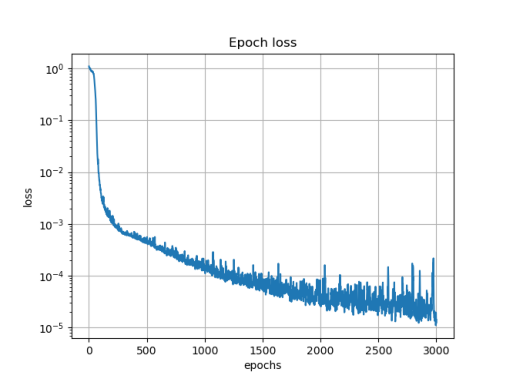

In [2]:
plt.imshow(mpimg.imread('epoch_loss.png'))
plt.axis('off')
plt.show()

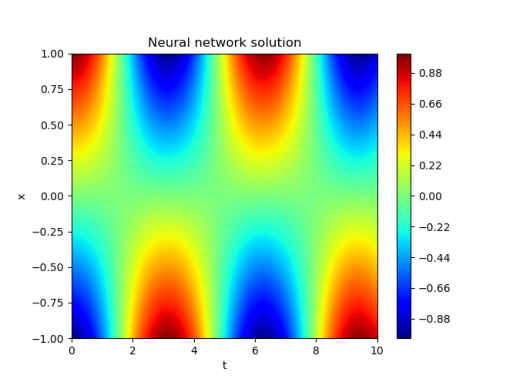

In [3]:
plt.imshow(mpimg.imread('solution.png'))
plt.axis('off')
plt.show()